## Time Series Challenge
In this challenge, we will compare the various time series prediction techniques on the dataset we can find [here](https://drive.google.com/file/d/1pgZlxluv5_cbgwR5JSWu4njbYXo_06Eb/view?usp=sharing).

- moving average
- ARIMA
- Prophet
- (Stretch) LSTMs

There are several item categories in this sales dataset. You can choose your own category or predict the overall sales.

> #### Note
> We have one order in every row, thus don't forget to transform the data into a time series format first. The data can be transformed into a daily, weekly or monthly time series.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_excel('Sample - Superstore.xls')

In [21]:
df=df[['Order Date', 'Profit']]

In [22]:
df.columns=['ds','y']

In [23]:
df = df.set_index('ds')

In [24]:
df.head()

,y
ds,
2016-11-08,41.9136
2016-11-08,219.5820
2016-06-12,6.8714
2015-10-11,-383.0310
2015-10-11,2.5164


In [38]:
df_month = df.resample('M').mean()

In [43]:
df_month.head()

,y
ds,
2014-01-31,31.015072
2014-02-28,18.745835
2014-03-31,3.176624
2014-04-30,25.843224
2014-05-31,22.448439


<AxesSubplot:xlabel='ds'>

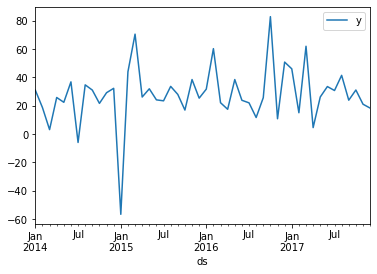

In [42]:
df_month.plot()

In [48]:
df_month.head()

,y
ds,
2014-01-31,31.015072
2014-02-28,18.745835
2014-03-31,3.176624
2014-04-30,25.843224
2014-05-31,22.448439


In [51]:
roll_mean.head()

,y
ds,
2014-01-31,NaN
2014-02-28,24.880453
2014-03-31,10.961229
2014-04-30,14.509924
2014-05-31,24.145832


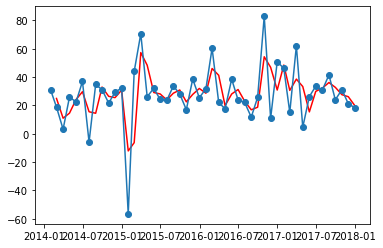

In [54]:
rolling = df_month.rolling(window=2, center=True) # window as past two months
roll_mean = rolling.mean()
fig, ax = plt.subplots()
ax.plot(roll_mean, color='red')
ax.plot(df_month, marker='o')

In [61]:
import math
from sklearn.metrics import mean_squared_error

In [66]:
X = df_month.values
window = 2
history = [X[i] for i in range(window)] # moving window 
test = [X[i] for i in range(window, len(X))] # takes 2 to the end of X
predictions = []
# walking forward with predictions
for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length-window, length)])
    obs = test[t] # actual value
    predictions.append(yhat)
    history.append(obs)
    print(f"predicted: {yhat}, expected: {obs}")

error = mean_squared_error(test, predictions)
print(f"MSE: {error}")
    

predicted: 24.880453467253712, expected: [3.17662357]
predicted: 10.961229174743831, expected: [25.8432237]
predicted: 14.509923635291335, expected: [22.44843934]
predicted: 24.145831523983, expected: [36.8631437]
predicted: 29.655791523982995, expected: [-5.88449371]
predicted: 15.489324998704985, expected: [34.75885621]
predicted: 14.437181251428301, expected: [31.07499776]
predicted: 32.91692698517217, expected: [21.68715283]
predicted: 26.381075295691346, expected: [29.22052484]
predicted: 25.453838836477978, expected: [32.31499964]
predicted: 30.76776224152752, expected: [-56.56908621]
predicted: -12.127043283304406, expected: [43.96641875]
predicted: -6.301333728448288, expected: [70.52244783]
predicted: 57.24443328804347, expected: [26.17185125]
predicted: 48.34714953804347, expected: [31.97170548]
predicted: 29.071778364726022, expected: [24.17070435]
predicted: 28.071204913639065, expected: [23.490345]
predicted: 23.83052467391304, expected: [33.68432956]
predicted: 28.5873372

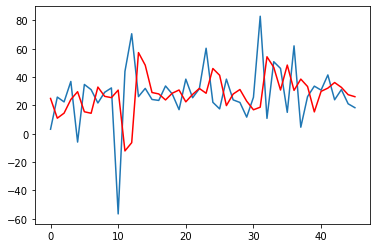

In [67]:
fig, ax = plt.subplots()
plt.plot(test)
plt.plot(predictions, color='red')

#### Predictions with ARIMA

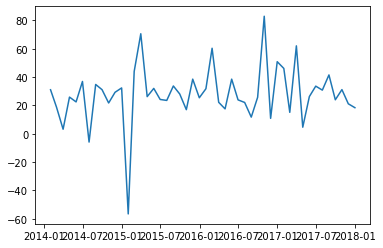

In [70]:
plt.plot(df_month)

In [71]:
# testing stationarity
from statsmodels.tsa.stattools import adfuller
def ADF_Stationarity_test(timeseries, sig_level):
    adf_res = adfuller(timeseries)
    print(f"ADF Statistic: {adf_res[0]}")
    print(f"p-value: {adf_res[1]}")
    if adf_res[1] >= sig_level:
        print(f"Non-Signficant, Time Series is Non-Stationary: {adf_res[1]} > {sig_level}")
    else:
        print(f"Significant, Time Series is Stationary: {adf_res[1]} < {sig_level}")

In [72]:
ADF_Stationarity_test(df_month, 0.05)

ADF Statistic: -6.330642917547261
p-value: 2.912129653555582e-08
Significant, Time Series is Stationary: 2.912129653555582e-08 < 0.05


In [73]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

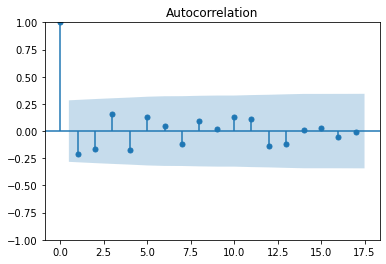

In [74]:
# checking for optimal params (p,d) with autocorrelation and partial
plot_acf(df_month) # checking for p
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/lhl_env38/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


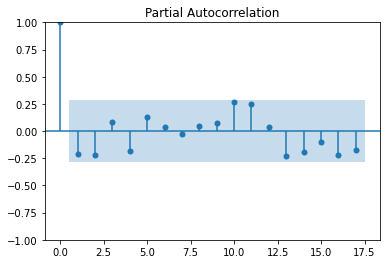

In [75]:
plot_pacf(df_month)
plt.show()

In [93]:
# params should be 0 for p and d change moving average q to 2 - for 2 months
from statsmodels.tsa.arima.model import ARIMA 
arima_mod = ARIMA(df_month, order=(0,0,2))

In [94]:
arima_fit = arima_mod.fit()

In [95]:
print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -210.590
Date:                Wed, 29 Jun 2022   AIC                            429.180
Time:                        11:08:37   BIC                            436.665
Sample:                    01-31-2014   HQIC                           432.009
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.0914      2.002     14.029      0.000      24.167      32.016
ma.L1         -0.2159      0.295     -0.733      0.464      -0.793       0.362
ma.L2         -0.1454      0.137     -1.065      0.2

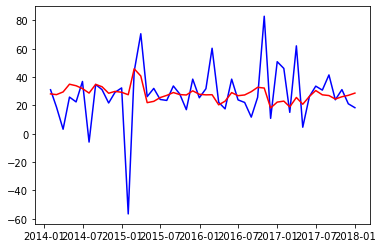

In [96]:
fig, ax = plt.subplots()
ax.plot(df_month, color='blue')
ax.plot(arima_fit.fittedvalues, color='red')

#### Using Prophet


In [97]:
from fbprophet import Prophet

In [120]:
p = Prophet(daily_seasonality=False,)

In [121]:
df_month = df_month.reset_index()

In [122]:
df_month.tail()

,level_0,index,ds,y
43,43,43,2017-08-31,41.472274
44,44,44,2017-09-30,23.946744
45,45,45,2017-10-31,31.125086
46,46,46,2017-11-30,21.111337
47,47,47,2017-12-31,18.362223


In [123]:
p.fit(df_month)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/opt/homebrew/Caskroom/miniforge/base/envs/lhl_env38/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -59.8621
Iteration  1. Log joint probability =    24.5458. Improved by 84.4079.
Iteration  2. Log joint probability =    39.1469. Improved by 14.6011.
Iteration  3. Log joint probability =    48.8961. Improved by 9.74927.
Iteration  4. Log joint probability =    52.8987. Improved by 4.00257.
Iteration  5. Log joint probability =    53.2186. Improved by 0.319865.
Iteration  6. Log joint probability =    53.2522. Improved by 0.0336044.
Iteration  7. Log joint probability =    53.2717. Improved by 0.0195408.
Iteration  8. Log joint probability =    53.2967. Improved by 0.0250143.
Iteration  9. Log joint probability =    53.3371. Improved by 0.0403627.
Iteration 10. Log joint probability =    53.7354. Improved by 0.398303.
Iteration 11. Log joint probability =    53.7826. Improved by 0.0471948.
Iteration 12. Log joint probability =     54.035. Improved by 0.252428.
Iteration 13. Log joint probability =    54.0594. Improved by 0.0243479.
Iteration 14. Log jo

In [134]:
future = p.make_future_dataframe(periods=24, freq='M') # predictions for the next 12 months
future.tail(12)

,ds
60,2019-01-31
61,2019-02-28
62,2019-03-31
63,2019-04-30
64,2019-05-31
65,2019-06-30
66,2019-07-31
67,2019-08-31
68,2019-09-30
69,2019-10-31


In [135]:
forecast = p.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

/opt/homebrew/Caskroom/miniforge/base/envs/lhl_env38/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/Caskroom/miniforge/base/envs/lhl_env38/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
67,2019-08-31,50.925128,29.614657,69.984121
68,2019-09-30,44.006698,23.818610,65.622989
69,2019-10-31,25.345777,6.014609,45.517956
70,2019-11-30,58.064816,37.835663,78.772077
71,2019-12-31,41.483283,20.742040,62.635358


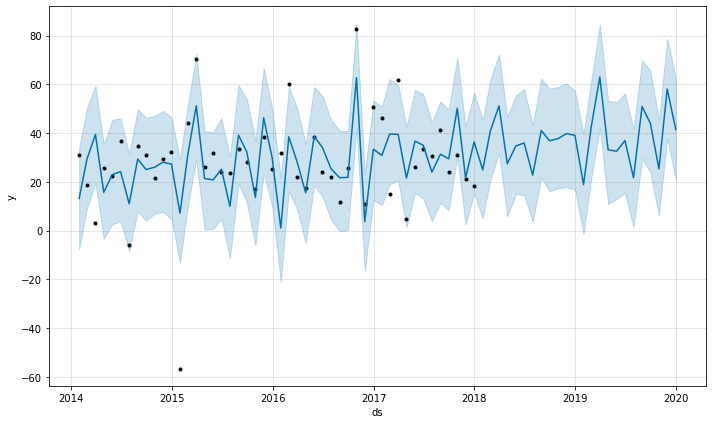

In [136]:
fig1 = p.plot(forecast)

/opt/homebrew/Caskroom/miniforge/base/envs/lhl_env38/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


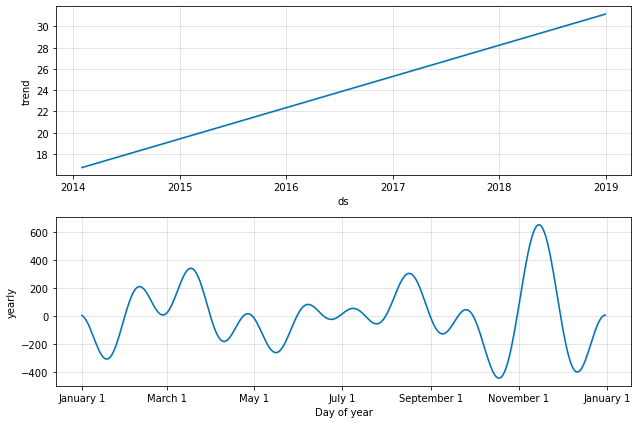

In [133]:
fig2 = p.plot_components(forecast)